In [39]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from nltk.tokenize import TweetTokenizer
import string

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [42]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [43]:

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets

print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [44]:
labels = np.append(np.ones(len(all_positive_tweets)) ,np.zeros(len(all_negative_tweets)))

In [45]:
freqs = build_freqs(tweets, labels)

In [49]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data =[]

for word in keys:
    
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
    
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
    
    data.append([word, pos, neg])

C:\Users\Ammar\Anaconda3\envs\pytorch-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ammar\Anaconda3\envs\pytorch-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ammar\Anaconda3\envs\pytorch-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ammar\Anaconda3\envs\pytorch-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128556 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\Ammar\Anaconda3\envs\pytorch-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ammar\Anaconda3\envs\pytorch-

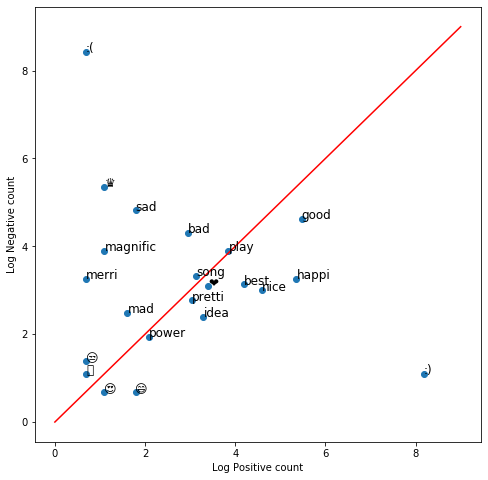

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.log([x[1]+1 for x in data])

y = np.log([x[2]+1 for x in data])

ax.scatter(x, y)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range (len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
    
ax.plot([0, 9], [0, 9], color='red')
plt.show()